In [1]:
import pandas as pd
import numpy as np

import pyaf.ForecastEngine as autof
import pyaf.Bench.TS_datasets as tsds


%matplotlib inline  

In [2]:
b1 = tsds.load_ozone()
df = b1.mPastData

     Month  Ozone       Time
0  1955-01    2.7 1955-01-01
1  1955-02    2.0 1955-02-01
2  1955-03    3.6 1955-03-01
3  1955-04    5.0 1955-04-01
4  1955-05    6.5 1955-05-01


In [3]:
b1.mHorizon

12

In [4]:

lEngine = autof.cForecastEngine()


INFO:pyaf.std:START_TRAINING 'Ozone'
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS '['Ozone']' 2.5102450847625732
INFO:pyaf.std:TIME_DETAIL TimeVariable='Time' TimeMin=1955-01-01T00:00:00.000000 TimeMax=1967-09-01T00:00:00.000000 TimeDelta=<DateOffset: months=1> Horizon=12
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='Ozone' Length=204  Min=1.2 Max=8.7  Mean=3.8357843137254894 StdDev=1.491559215940118
INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='_Ozone' Min=1.2 Max=8.7  Mean=3.8357843137254894 StdDev=1.491559215940118
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_Ozone_LinearTrend_residue_zeroCycle_residue_AR(51)' [LinearTrend + NoCycle + AR]
INFO:pyaf.std:TREND_DETAIL '_Ozone_LinearTrend' [LinearTrend]
INFO:pyaf.std:CYCLE_DETAIL '_Ozone_LinearTrend_residue_zeroCycle' [NoCycle]
INFO:pyaf.std:AUTOREG_DETAIL '_Ozone_LinearTrend_residue_zeroCycle_residue_AR(51)' [AR]
INFO:pyaf.std:MODEL_MAPE MAPE_Fit=0.1641 MAPE_Forecast=0.1595 MAPE_

  Split Transformation                                              Model  \
0  None         _Ozone  _Ozone_LinearTrend_residue_zeroCycle_residue_A...   
1  None         _Ozone  _Ozone_LinearTrend_residue_bestCycle_byMAPE_re...   
2  None         _Ozone  _Ozone_PolyTrend_residue_zeroCycle_residue_AR(51)   
3  None         _Ozone  _Ozone_PolyTrend_residue_bestCycle_byMAPE_resi...   
4  None         _Ozone  _Ozone_LinearTrend_residue_Seasonal_MonthOfYea...   

                                         Category  Complexity  FitMAPE  \
0                 NoTransf_LinearTrend_NoCycle_AR          54   0.1641   
1              NoTransf_LinearTrend_Cycle_None_AR          62   0.1641   
2                   NoTransf_PolyTrend_NoCycle_AR          54   0.1640   
3                NoTransf_PolyTrend_Cycle_None_AR          62   0.1640   
4  NoTransf_LinearTrend_Seasonal_MonthOfYear_NoAR          20   0.1761   

   ForecastMAPE  TestMAPE  
0        0.1595    0.1740  
1        0.1595    0.1740  
2       

INFO:pyaf.std:END_PLOTTING_TIME_IN_SECONDS 1.5875802040100098


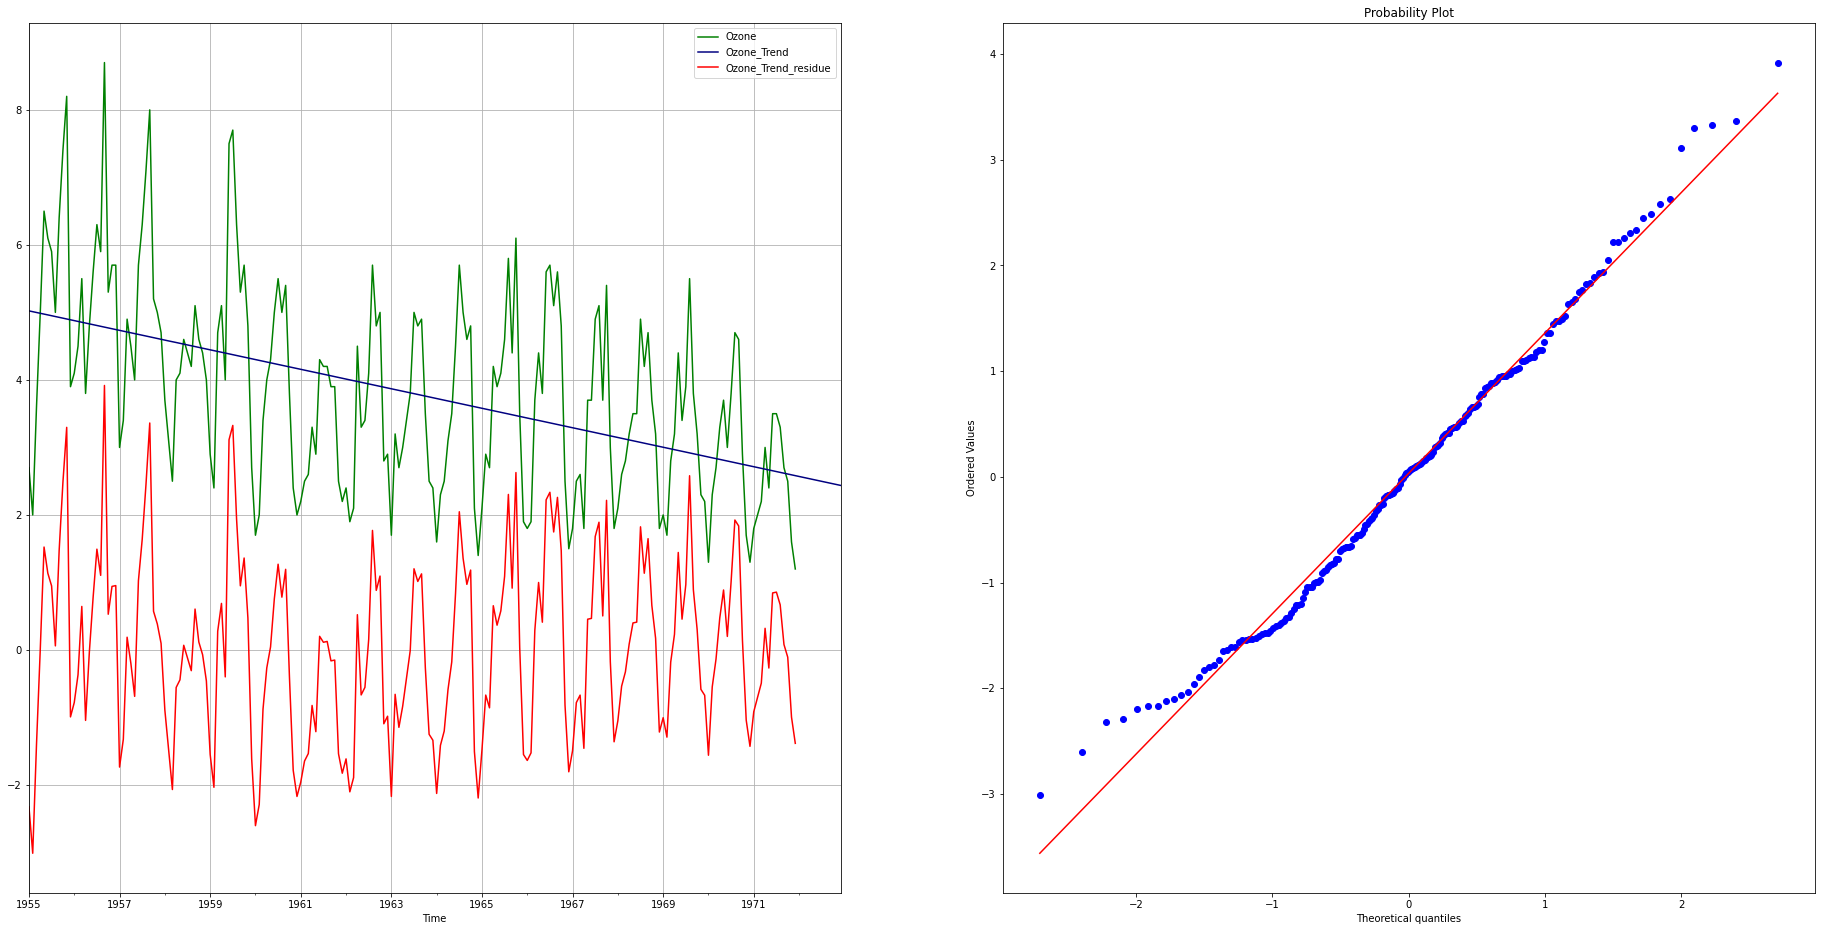

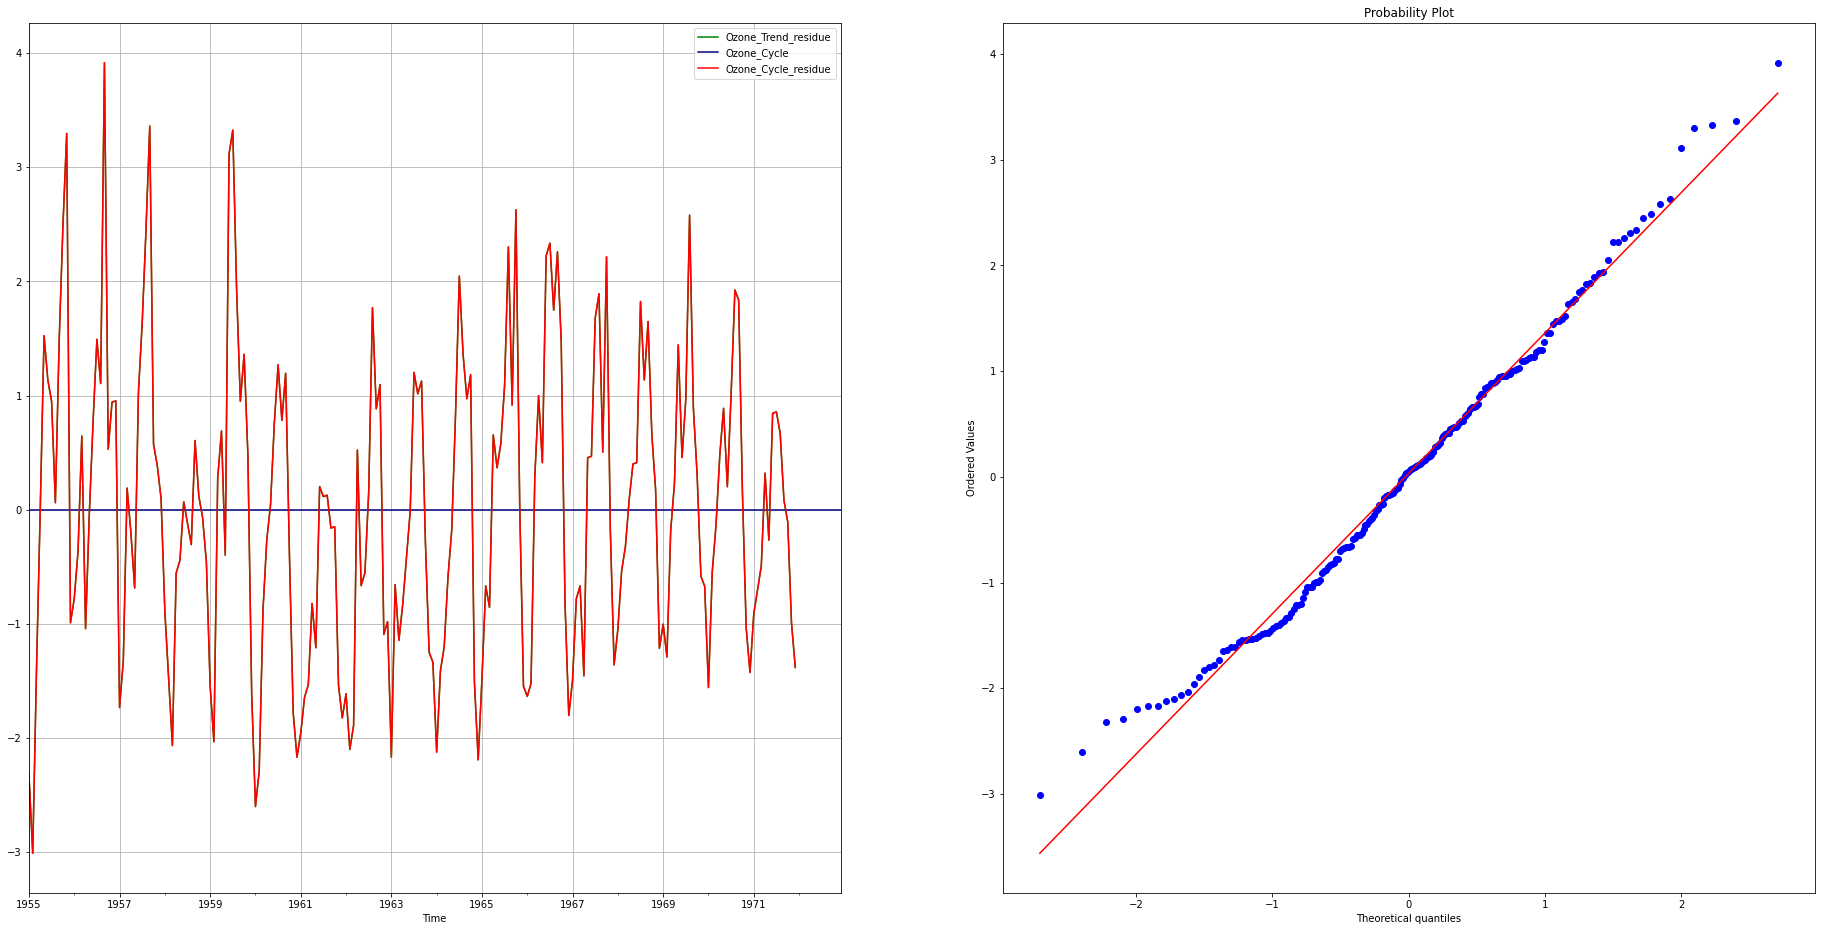

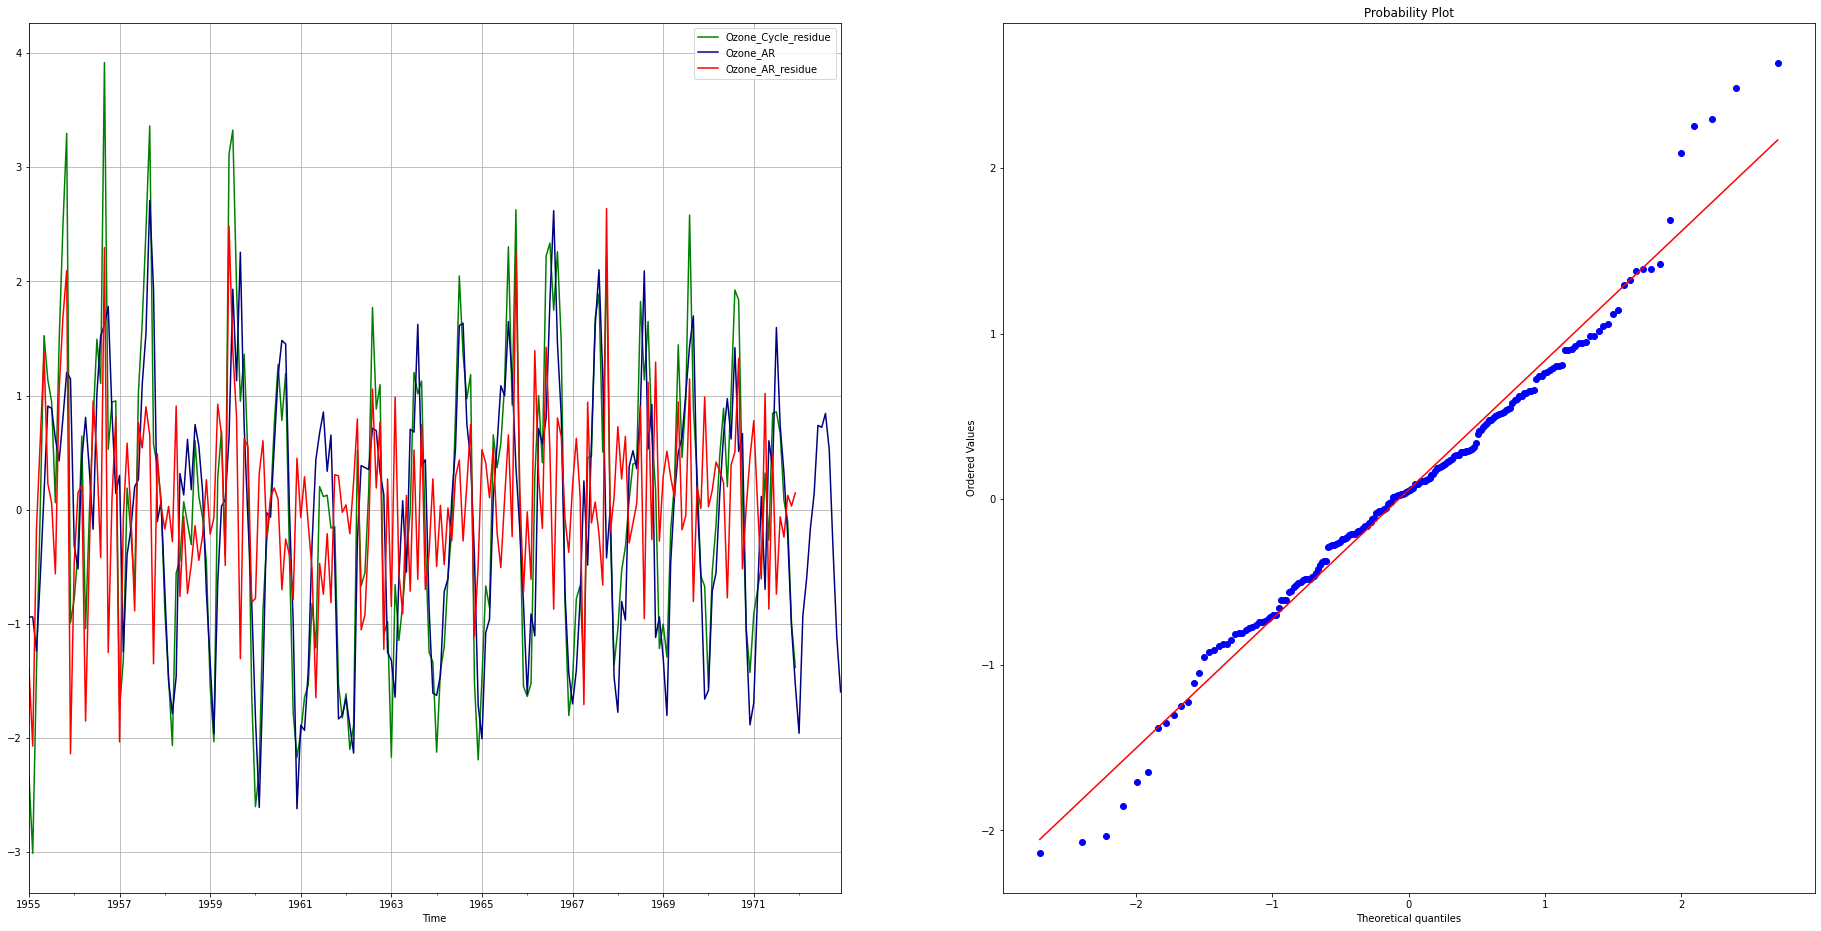

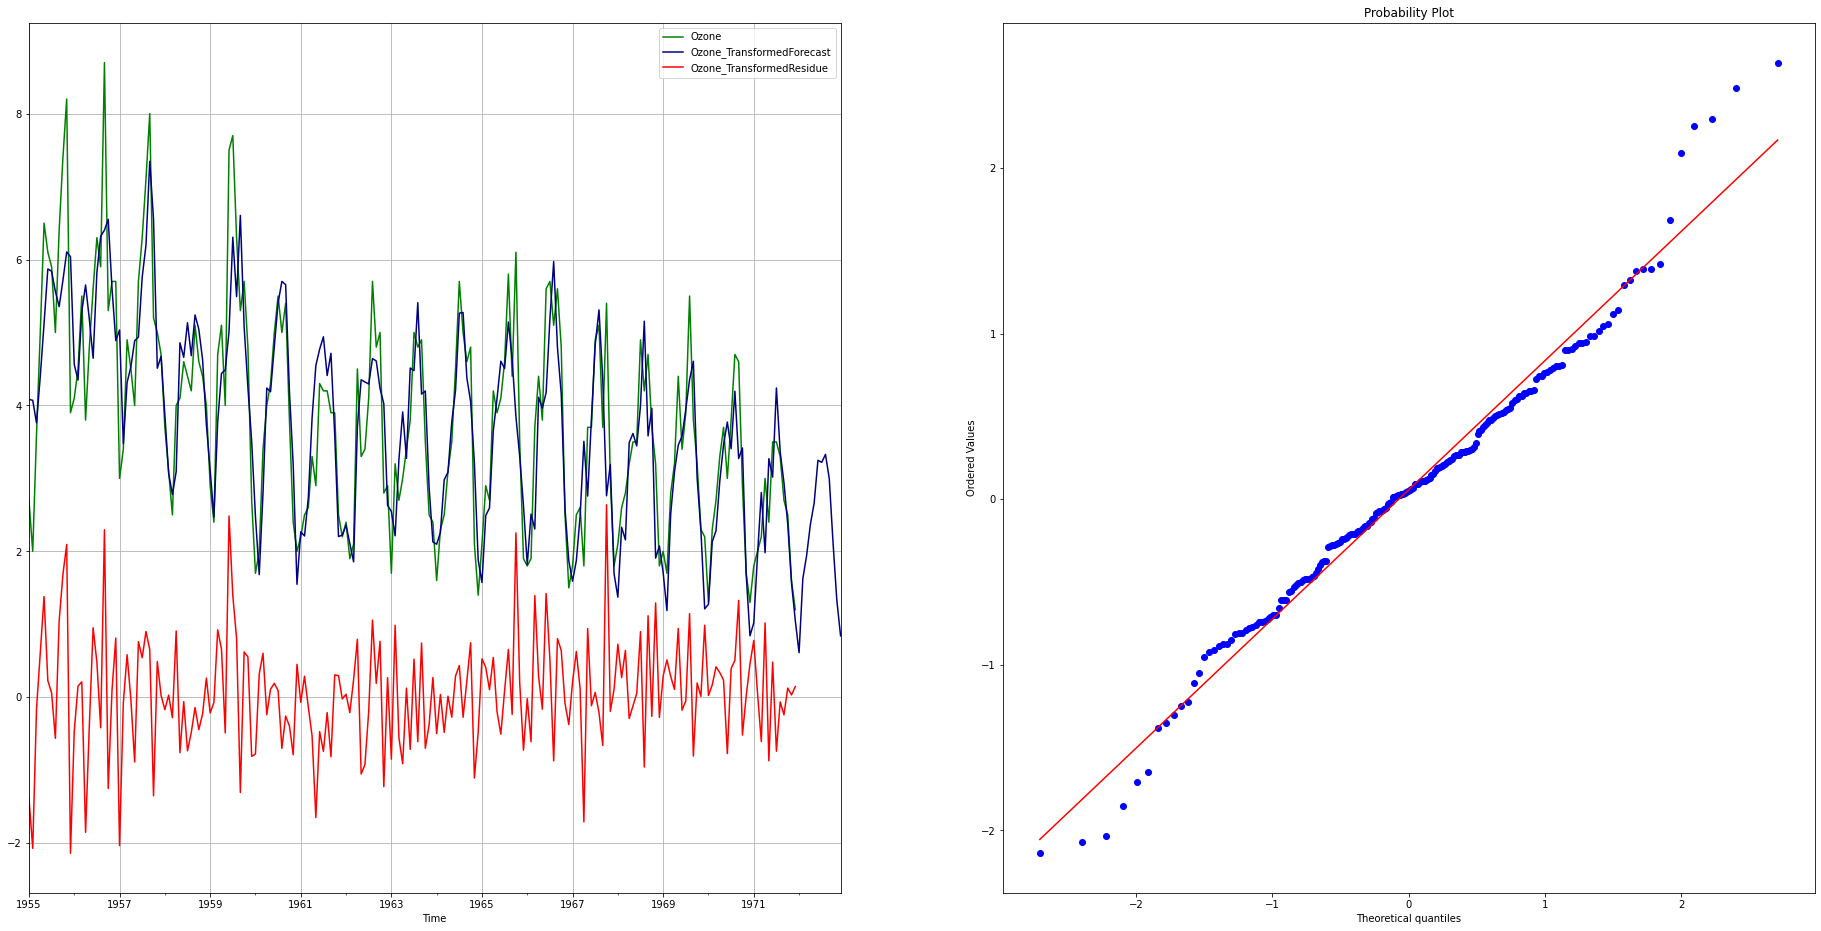

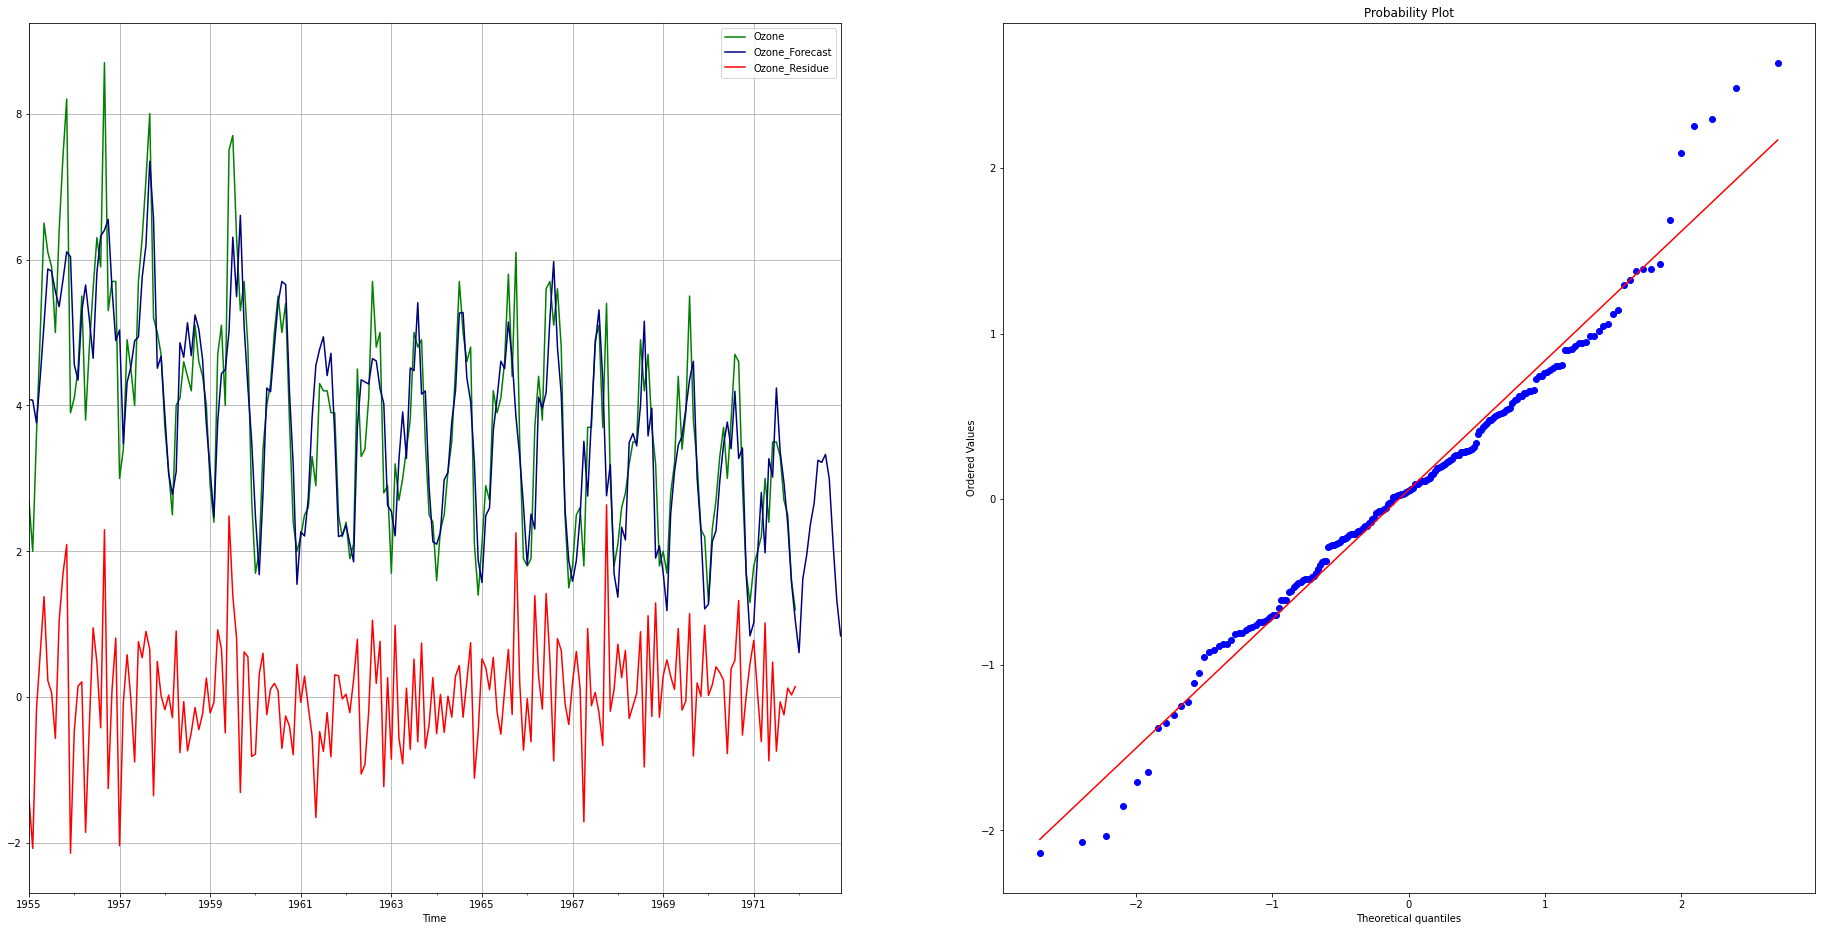

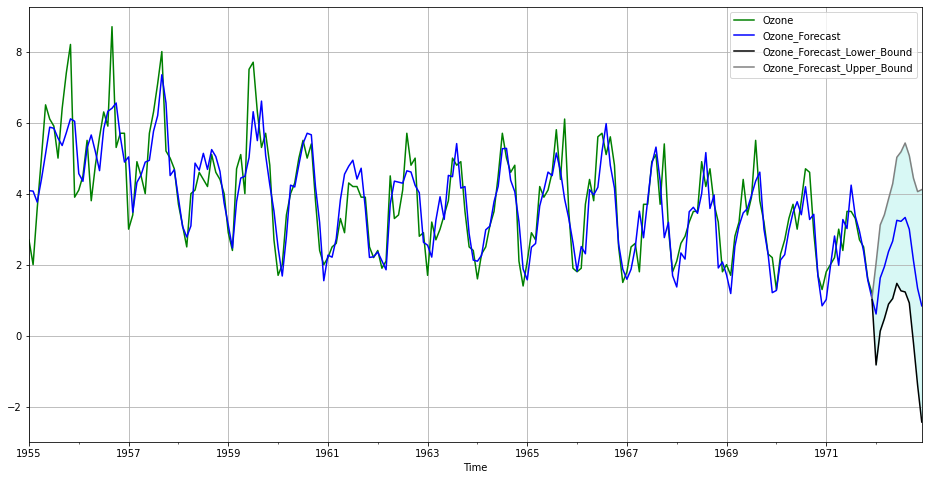

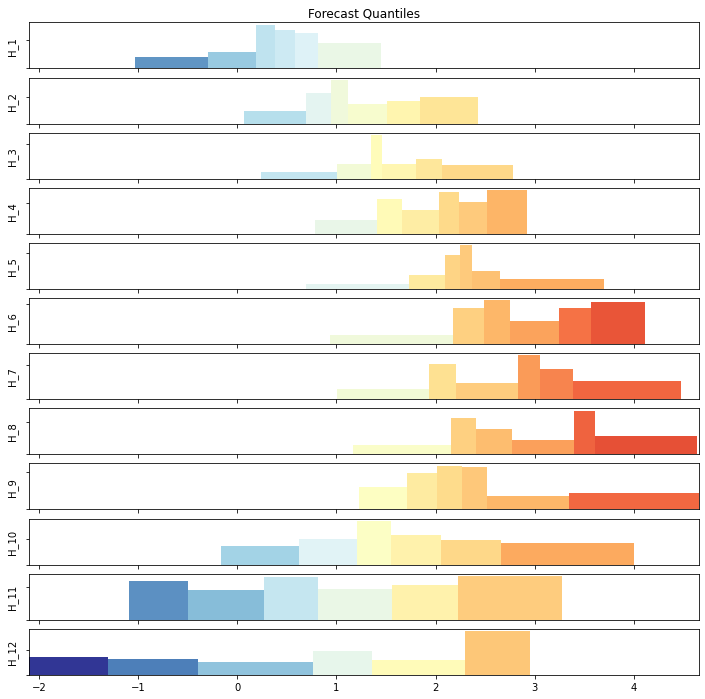

In [5]:
lEngine.mOptions.mModelSelection_Criterion = 'MAPE'
lEngine.train(df , b1.mTimeVar , b1.mSignalVar, b1.mHorizon);
lEngine.getModelInfo();
print(lEngine.mSignalDecomposition.mTrPerfDetails.head());
lEngine.standardPlots()

In [6]:
dfapp_in = df.copy();
dfapp_in.tail()

#H = 12
dfapp_out = lEngine.forecast(dfapp_in, b1.mHorizon);
#dfapp_out.to_csv("outputs/ozone_apply_out.csv")
dfapp_out.tail(2 * b1.mHorizon)


INFO:pyaf.std:START_FORECASTING '['Ozone']'
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS  '['Ozone']' 0.49213409423828125


,Time,Ozone,row_number,Time_Normalized,_Ozone,_Ozone_LinearTrend,_Ozone_LinearTrend_residue,_Ozone_LinearTrend_residue_zeroCycle,_Ozone_LinearTrend_residue_zeroCycle_residue,_Ozone_LinearTrend_residue_zeroCycle_residue_AR(51),...,Ozone_Residue,Ozone_Forecast_Lower_Bound,Ozone_Forecast_Upper_Bound,Ozone_Forecast_Quantile_2,Ozone_Forecast_Quantile_18,Ozone_Forecast_Quantile_34,Ozone_Forecast_Quantile_50,Ozone_Forecast_Quantile_66,Ozone_Forecast_Quantile_82,Ozone_Forecast_Quantile_98
192,1971-01-01,1.8,192,1.263294,1.8,2.714376,-0.914376,0.0,-0.914376,-1.694252,...,0.779877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,1971-02-01,2.0,193,1.269996,2.0,2.702132,-0.702132,0.0,-0.702132,-0.754424,...,0.052292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,1971-03-01,2.2,194,1.276048,2.2,2.691073,-0.491073,0.0,-0.491073,0.116115,...,-0.607188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,1971-04-01,3.0,195,1.282750,3.0,2.678829,0.321171,0.0,0.321171,-0.697799,...,1.018970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,1971-05-01,2.4,196,1.289235,2.4,2.666980,-0.266980,0.0,-0.266980,0.604132,...,-0.871112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,1971-06-01,3.5,197,1.295936,3.5,2.654736,0.845264,0.0,0.845264,0.363310,...,0.481954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,1971-07-01,3.5,198,1.302421,3.5,2.642886,0.857114,0.0,0.857114,1.596277,...,-0.739163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199,1971-08-01,3.3,199,1.309122,3.3,2.630642,0.669358,0.0,0.669358,0.732498,...,-0.063140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,1971-09-01,2.7,200,1.315824,2.7,2.618398,0.081602,0.0,0.081602,0.322207,...,-0.240605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201,1971-10-01,2.5,201,1.322309,2.5,2.606549,-0.106549,0.0,-0.106549,-0.232856,...,0.126307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
